In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset

heart_data = pd.read_csv('heart.csv')

# Display the first few rows to understand the structure of the dataset
heart_data.head()

# Summary statistics of the dataset
#heart_data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
#data cleaning
## Step 1: Remove Duplicate Observations
heart_data.drop_duplicates(inplace=True)
# Check for missing values and data types
missing_data = heart_data.isnull().sum()
data_types = heart_data.dtypes

missing_data, data_types


(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 target        int64
 dtype: object)

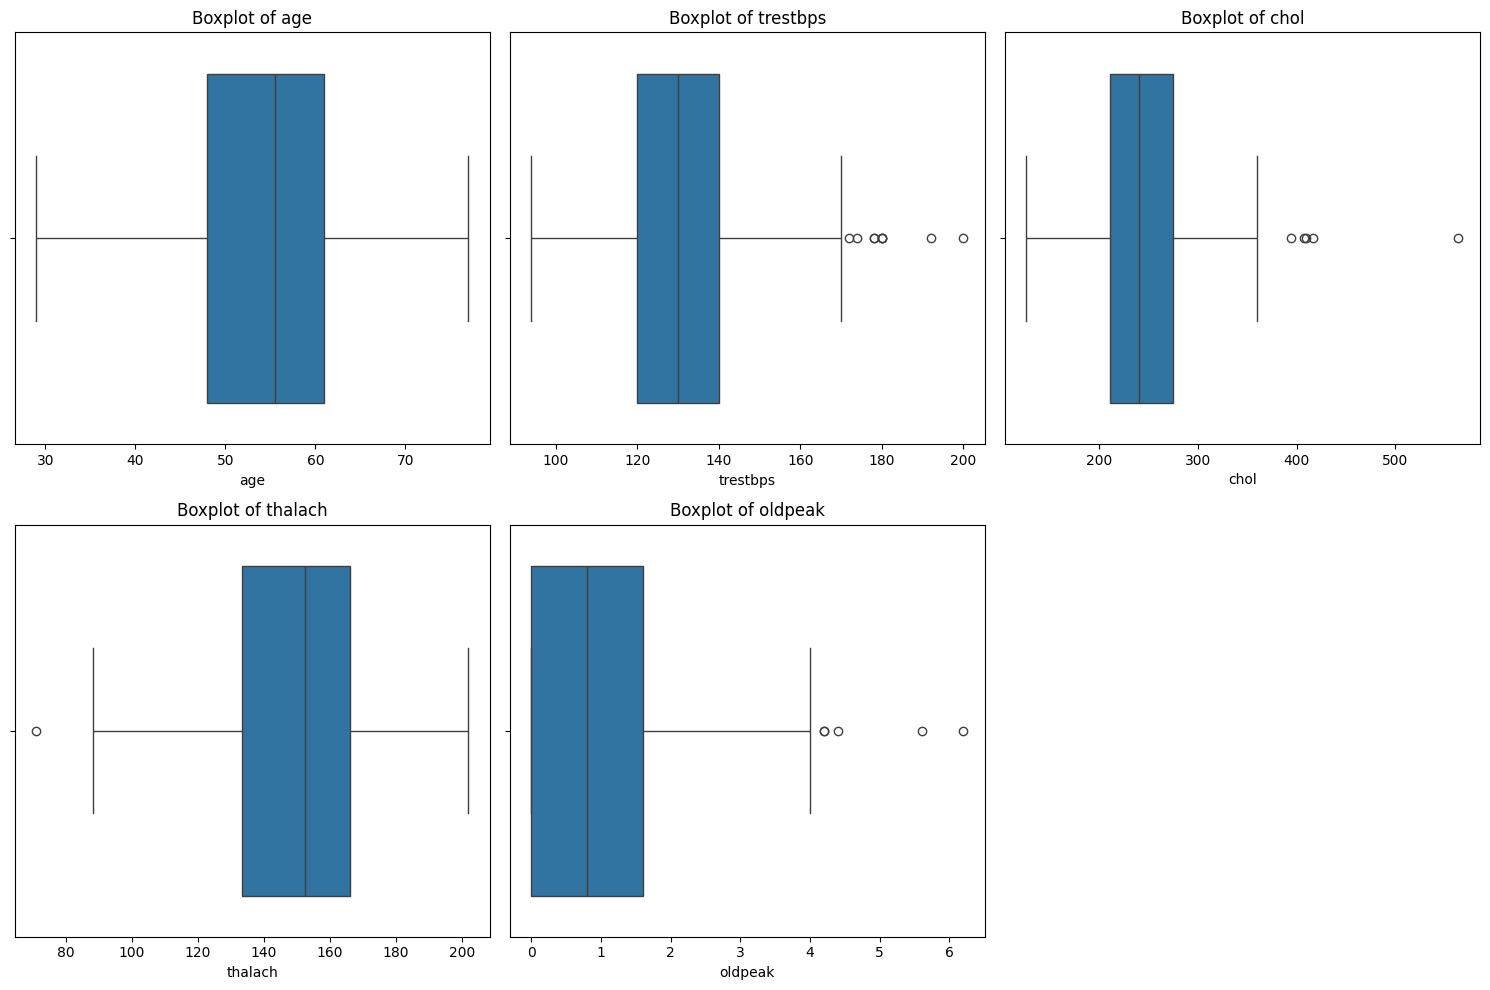

In [10]:

# List of continuous variables to check for outliers
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plotting boxplots for each continuous variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_data, x=var)
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()


In [22]:
for column in heart_data.select_dtypes(include=[np.number]).columns:
    Q1 = heart_data[column].quantile(0.25)
    Q3 = heart_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Remove outliers
    heart_data = heart_data[(heart_data[column] >= lower_bound) & (heart_data[column] <= upper_bound)]
    categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

    

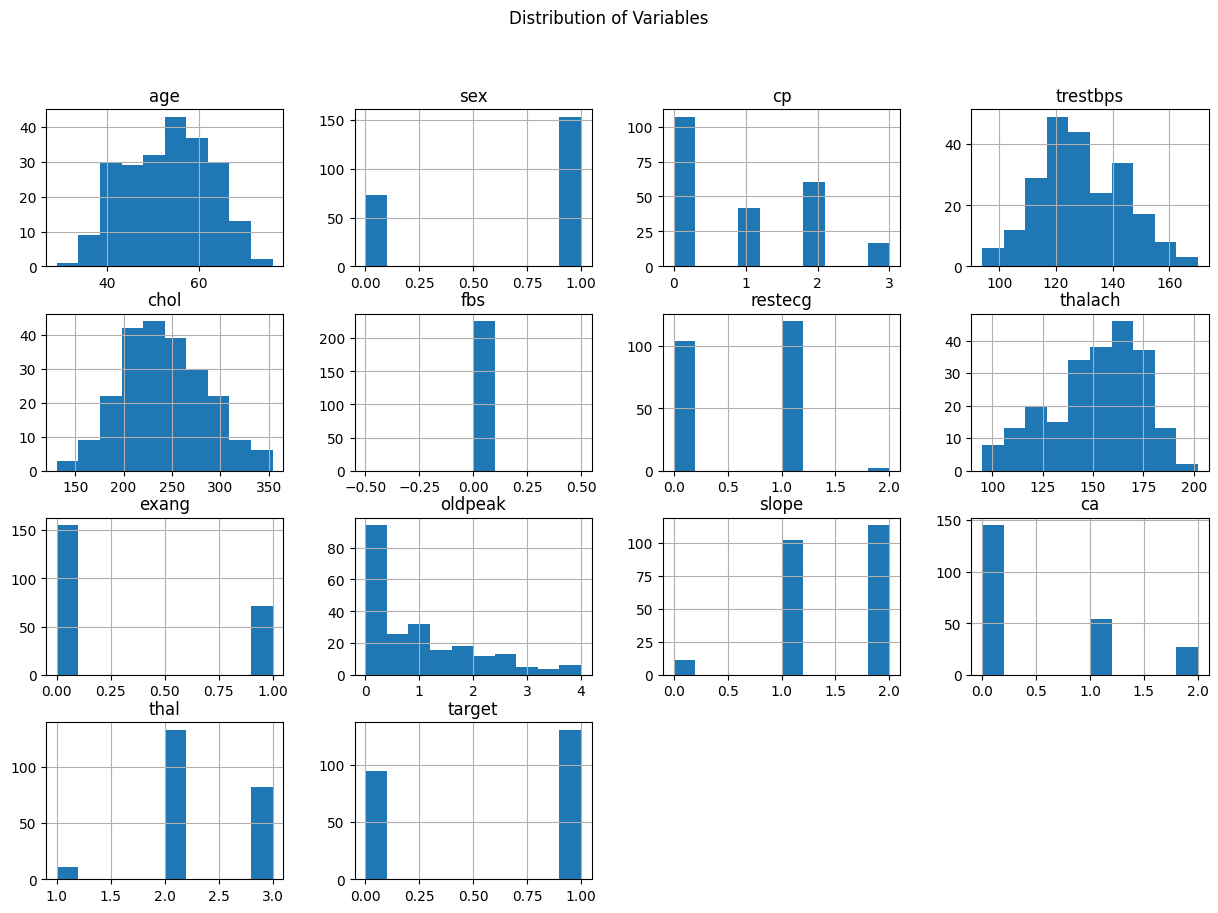

In [16]:
# EDA

# Visualization 1: Distribution of each variable (histograms)
heart_data.hist(bins=10, figsize=(15, 10))
plt.suptitle('Distribution of Variables')
plt.show()

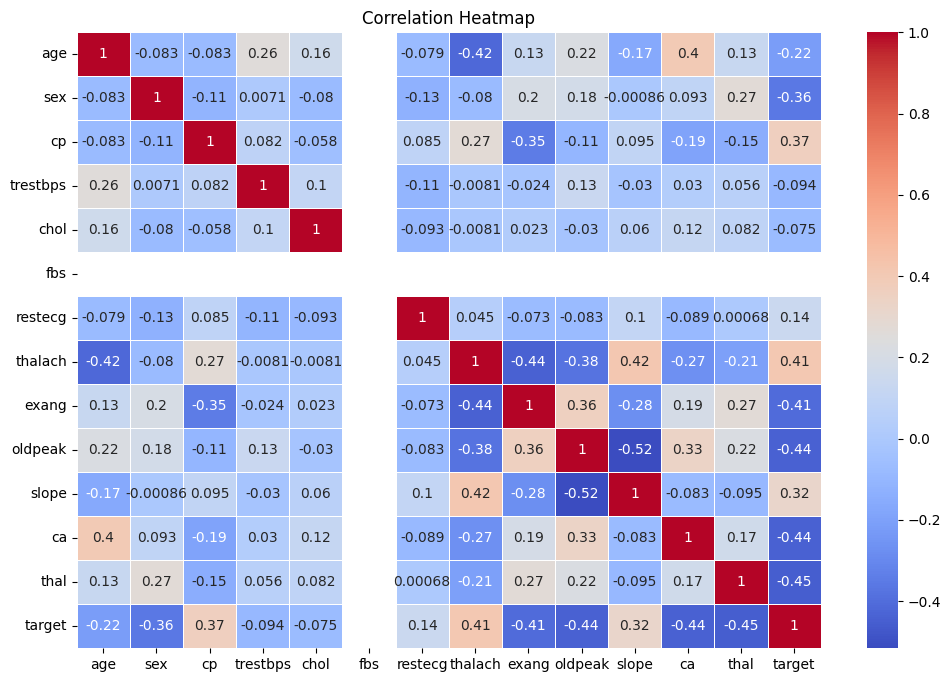

In [17]:

# Visualization 3: Correlation heatmap to check for relationships between variables
plt.figure(figsize=(12, 8))
corr_matrix = heart_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

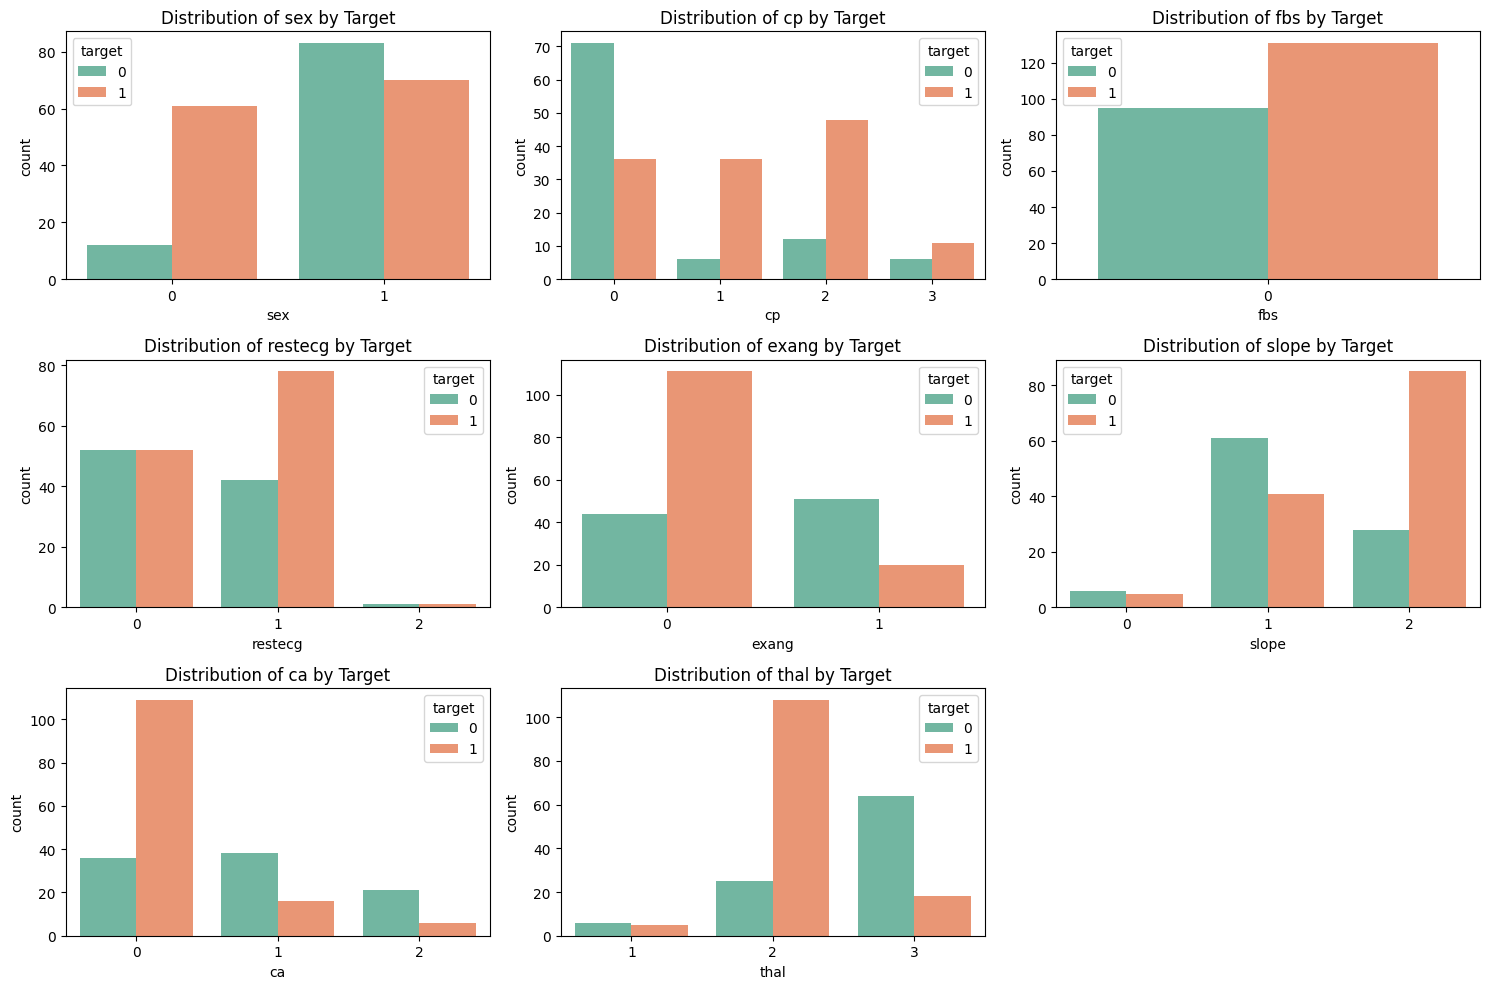

In [23]:
# Bar plots for categorical variables against target
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols[:-1], 1):  # excluding 'target' from categorical_cols
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='target', data=heart_data, palette='Set2')
    plt.title(f"Distribution of {col} by Target")
plt.tight_layout()
plt.show()



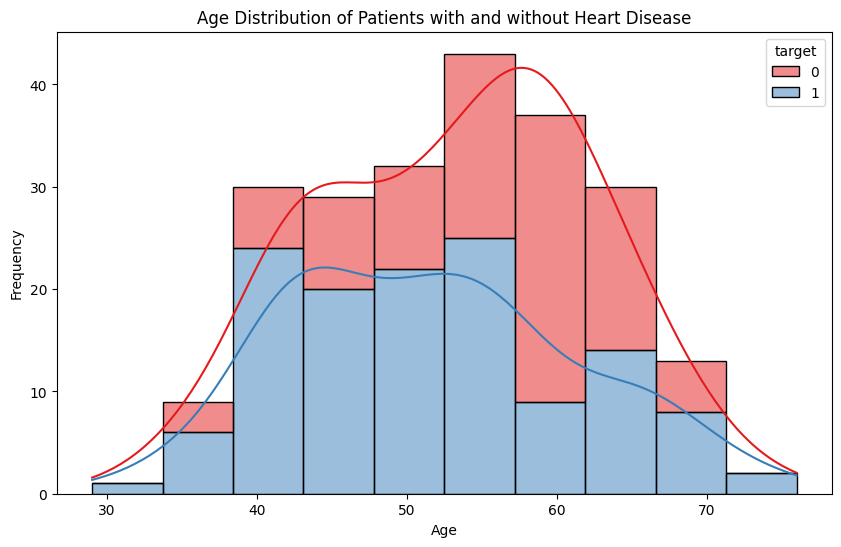

In [24]:
# question 1 . What is the age distribution of patients with and without heart disease?
# Plot the age distribution for patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.histplot(data=heart_data, x='age', hue='target', kde=True, multiple='stack', palette='Set1')
plt.title('Age Distribution of Patients with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


T-test results: T-statistic = -1.1283957874857637, P-value = 0.26035989888910765


C:\Users\tarun\AppData\Local\Temp\ipykernel_25796\2668013998.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=heart_data, palette='Set2')


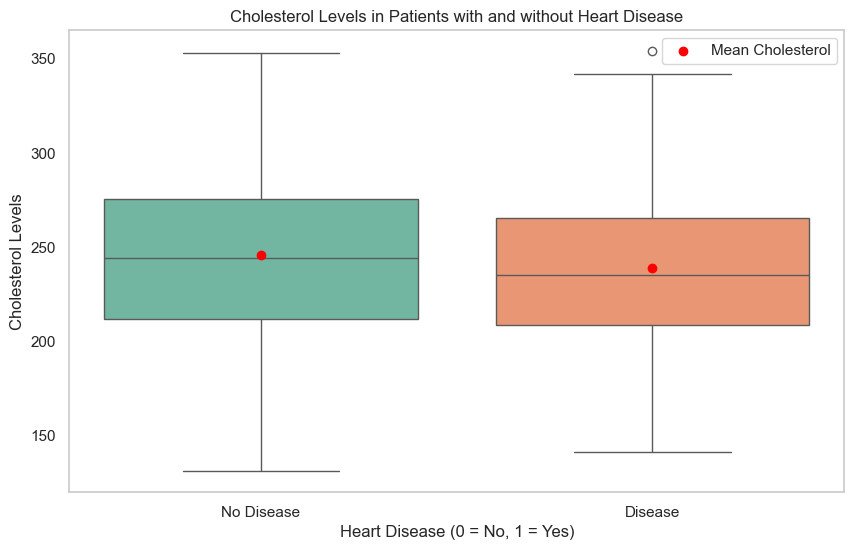

In [28]:
#question 2. Is there a significant difference in cholesterol levels between patients with and without heart disease?
from scipy.stats import ttest_ind

# Perform a t-test to check if there's a significant difference in cholesterol levels
chol_disease = heart_data[heart_data['target'] == 1]['chol']
chol_no_disease = heart_data[heart_data['target'] == 0]['chol']
t_stat, p_val = ttest_ind(chol_disease, chol_no_disease)

print(f"T-test results: T-statistic = {t_stat}, P-value = {p_val}")
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot to visualize cholesterol levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=heart_data, palette='Set2')
plt.title('Cholesterol Levels in Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.grid(axis='y')

# Optionally, add means as points
mean_chol_disease = heart_data[heart_data['target'] == 1]['chol'].mean()
mean_chol_no_disease = heart_data[heart_data['target'] == 0]['chol'].mean()
plt.scatter([0, 1], [mean_chol_no_disease, mean_chol_disease], color='red', label='Mean Cholesterol', zorder=3)
plt.legend()

plt.show()

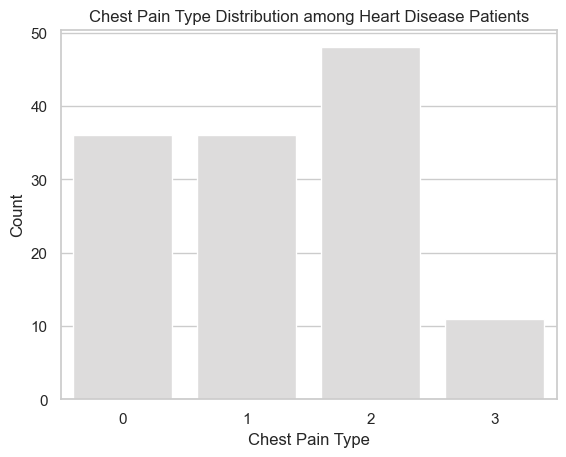

In [30]:
# question 3.Which type of chest pain (cp) is most common among heart disease patients?
# Count plot of chest pain types among heart disease patients
sns.countplot(data=heart_data[heart_data['target'] == 1], x='cp',hue='target' ,palette='coolwarm',legend=False)
plt.title('Chest Pain Type Distribution among Heart Disease Patients')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


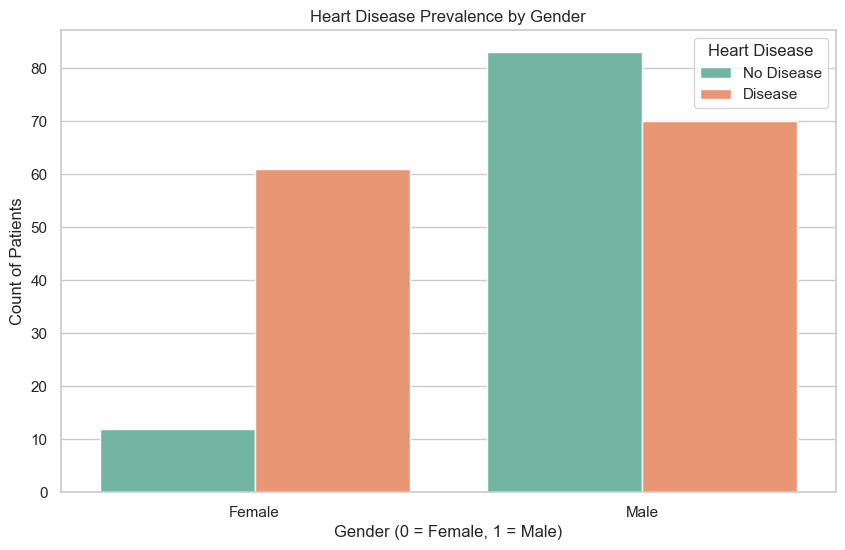

In [32]:
#question 4 . relationship between gender and heart disease
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a count plot for heart disease by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=heart_data, palette='Set2')
plt.title('Heart Disease Prevalence by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count of Patients')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

C:\Users\tarun\AppData\Local\Temp\ipykernel_25796\3698904746.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y='thalach', data=heart_data, palette='Set2', jitter=True)


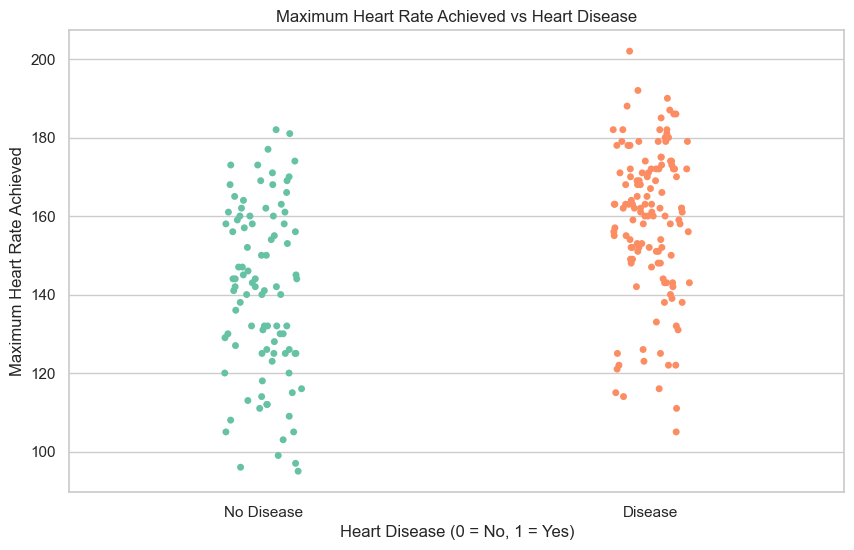

In [35]:
 #ques 5.How do maximum heart rate achieved (thalach) values compare for patients with and without heart disease?
# Boxplot for maximum heart rate achieved vs target
sns.set(style="whitegrid")

# Create a strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='target', y='thalach', data=heart_data, palette='Set2', jitter=True)
plt.title('Maximum Heart Rate Achieved vs Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

target   0    1
exang          
0       44  111
1       51   20


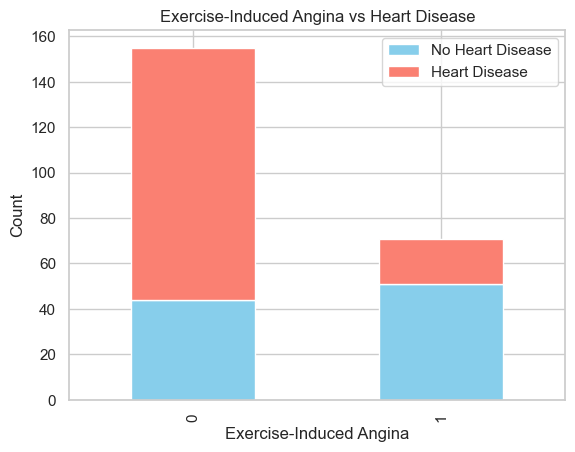

In [40]:
"""ques6.Is there any relationship between exercise-induced angina (exang) and heart disease?
This question looks at whether exercise-induced angina is a predictor of heart disease."""
# Cross-tabulation between exercise-induced angina and heart disease
exang_heart_disease = pd.crosstab(heart_data['exang'], heart_data['target'])

print(exang_heart_disease)

# Visualizing the relationship
exang_heart_disease.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Exercise-Induced Angina vs Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()


In [39]:
 # ques7. Which factors have the strongest correlation with the presence of heart disease?
# Correlation matrix focusing on the target variable
corr_matrix = heart_data.corr()
heart_corr = corr_matrix['target'].sort_values(ascending=False)

print("Correlation of each feature with heart disease:\n", heart_corr)



Correlation of each feature with heart disease:
 target      1.000000
thalach     0.412524
cp          0.365707
slope       0.318609
restecg     0.141375
chol       -0.075181
trestbps   -0.094148
age        -0.219669
sex        -0.358192
exang      -0.408532
oldpeak    -0.439509
ca         -0.443804
thal       -0.451250
fbs              NaN
Name: target, dtype: float64
